Author: Adam Moss

Data from 

https://www.england.nhs.uk/statistics/statistical-work-areas/covid-19-hospital-activity/ 

https://www.england.nhs.uk/statistics/statistical-work-areas/uec-sitrep/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime
import urllib3
from dateutil import parser
import matplotlib.dates as mdates

In [2]:
colors = ['#006FED', '#E03424', 'gray', '#009966', '#000866', '#336600', '#006633', 'm', 'r']

In [3]:
covid_ventilator = pd.read_csv('covid_hospital_activity/ventilator.csv')
covid_ventilator['Date'] = pd.to_datetime(covid_ventilator['Date'])

In [33]:
def extract_data(year, occupied, region):
    uec = pd.read_csv('uec_sitrep/' + year + '.csv')
    uec.head()
    num_columns = len(uec.columns)
    mask = np.zeros(num_columns)
    for i in range(3, num_columns):
        if year in ['202021', '201617', '201516']:
            if (i - 4) % 2 == 0:
                mask[i] = 1
        else:
            if (i - 4) % 3 == 0:
                mask[i] = 1
    mask = mask.astype(bool)
    dates = uec.columns[mask]
    dates.values
    mask = np.zeros(num_columns)
    if occupied:
        offset = 1
    else:
        offset = 0
    for i in range(3, num_columns):
        if year in ['202021', '201617', '201516']:
            if (i - 4 - offset) % 2 == 0:
                mask[i] = 1
        else:
            if (i - 4 - offset) % 3 == 0:
                mask[i] = 1
    mask[0] = 1
    mask[1:3] = 0
    mask[3] = 1
    mask = mask.astype(bool)
    if year == '202021':
        df = uec.iloc[4:, mask]
    else:
        df = uec.iloc[3:, mask]
    df.columns = ['Region', 'Name'] + list(dates)
    df[dates] = df[dates].apply(pd.to_numeric, errors='coerce')
    s = df[df['Region'].str.contains(region)].sum()
    df.head()
    return np.array([parser.parse(d) for d in dates]), s[dates].values

In [42]:
def make_plot(region, plot_covid_only=False):
    plt.figure(figsize=(18,10))
    dates, values = extract_data('202021', True, region)
    plt.plot(dates, values, label='2020/21', color=colors[0])
    if plot_covid_only and region in covid_ventilator:
        plt.plot(covid_ventilator['Date'], covid_ventilator[region], label='2020/21 (Covid Only)', color=colors[0], linestyle='--')
        plt.title(region + ' ICU occupancy')
    dates, values = extract_data('201920', True, region)
    plt.plot(dates + + datetime.timedelta(days=1*365), values, label='2019/20', color=colors[1])
    dates, values = extract_data('201819', True, region)
    plt.plot(dates + + datetime.timedelta(days=2*365), values, label='2018/19', color=colors[2])
    dates, values = extract_data('201718', True, region)
    plt.plot(dates + + datetime.timedelta(days=3*365), values, label='2017/18', color=colors[3])
    dates, values = extract_data('201617', True, region)
    plt.plot(dates + + datetime.timedelta(days=4*365), values, label='2016/17', color=colors[4])
    dates, values = extract_data('201516', True, region)
    plt.plot(dates + + datetime.timedelta(days=5*365), values, label='2015/16', color=colors[5])
    plt.xlabel('Date (rescaled to this year)')
    plt.ylabel('Number')
    plt.legend()
    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
    ax.set_xlim([datetime.datetime(2020, 11, 1), datetime.datetime(2020, 12, 31)])
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    plt.gcf().autofmt_xdate() # Rotation
    plt.grid()
    plt.savefig('plots/' + region + '_icu')

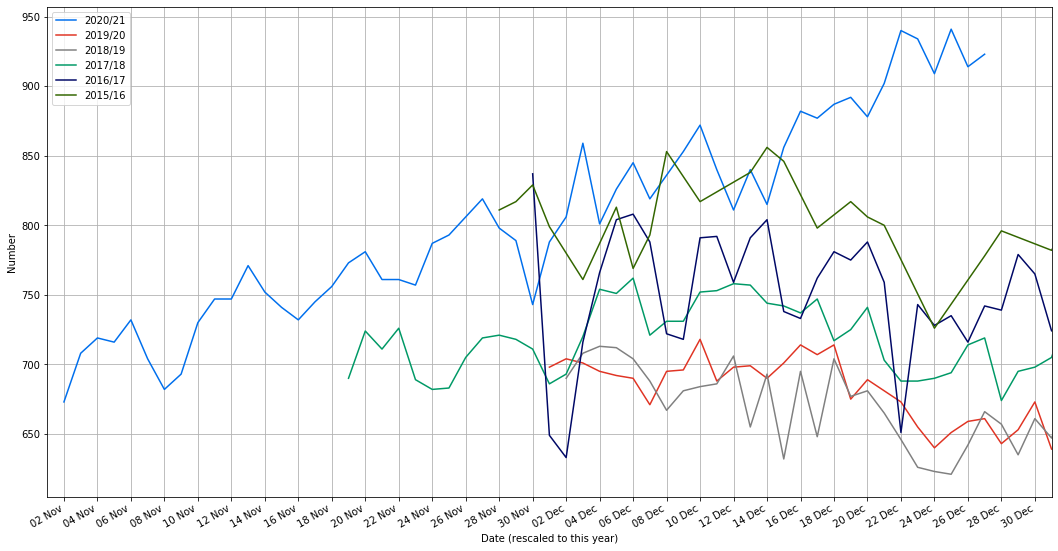

In [43]:
make_plot('London')

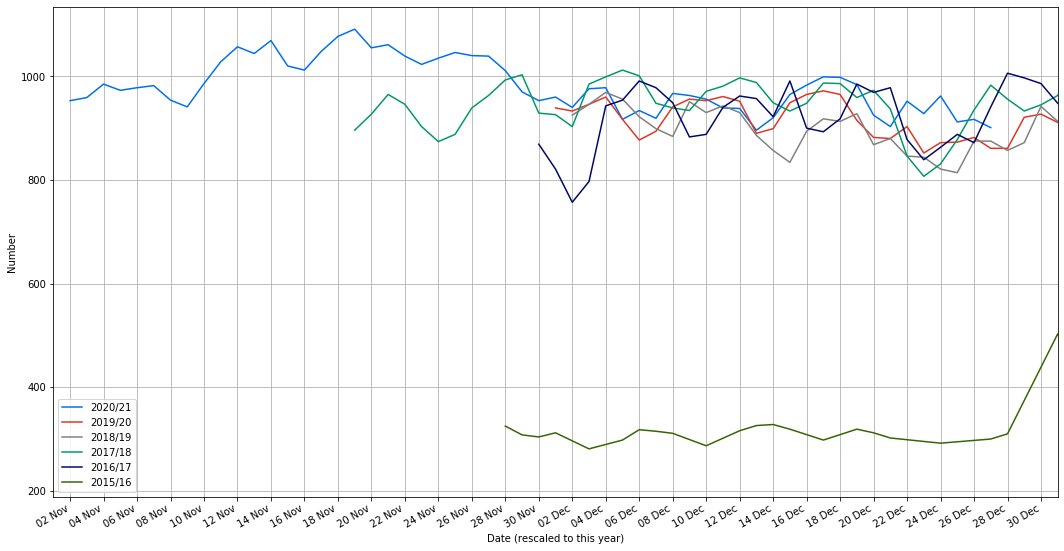

In [47]:
make_plot('North')

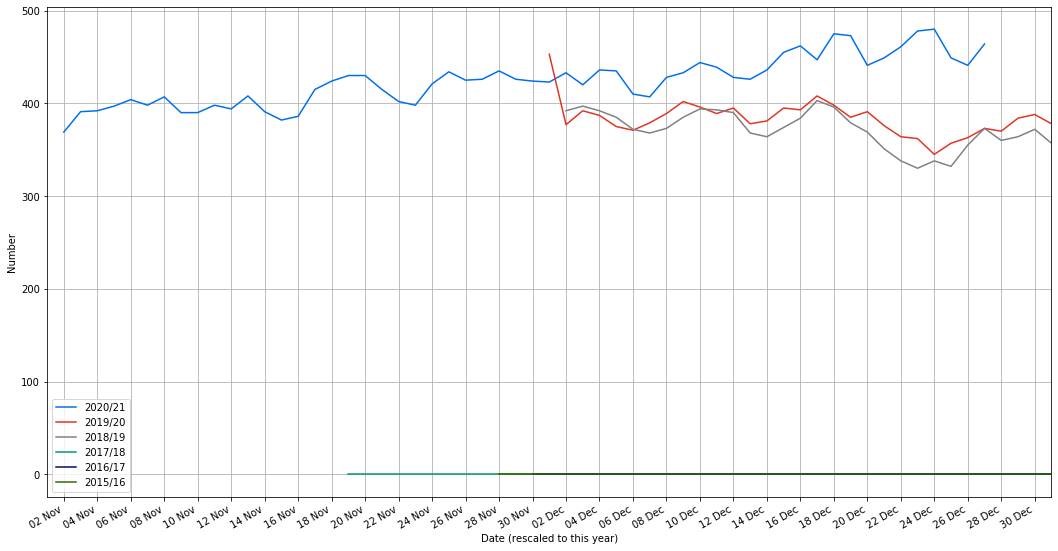

In [45]:
make_plot('South East')

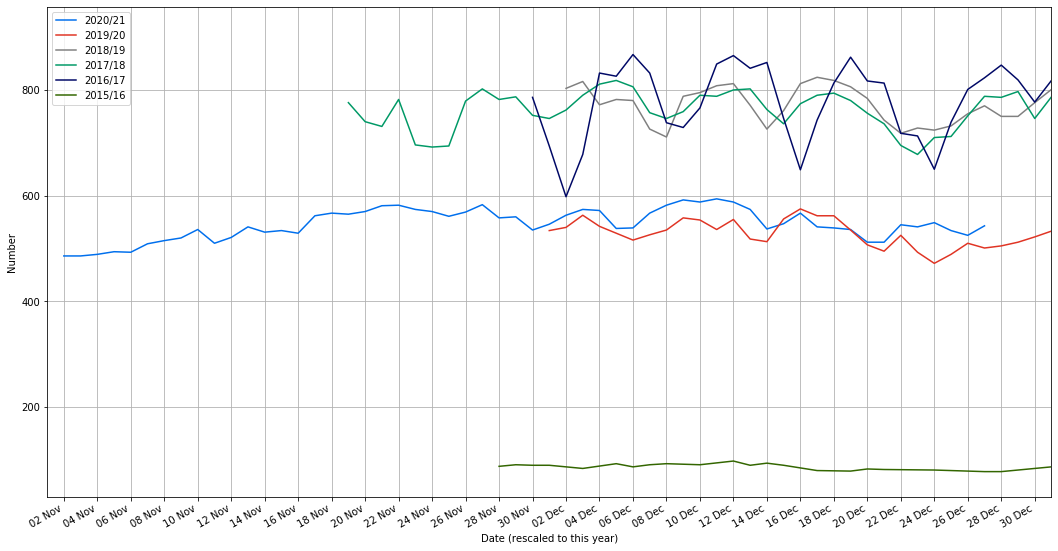

In [46]:
make_plot('Midlands')